<a href="https://colab.research.google.com/github/juh5ng/hello-world/blob/master/The_Red_Dynamic_Pricing_Part4_(%EA%B3%B5%EC%9C%A0%EC%9E%90%EB%A3%8C).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##The Red: 비즈니스의 운명을 바꾸는 Dynamic Pricing
##Part4.  시뮬레이션 기반 실습 - 수요기반 모빌리티 서비스의 탄력요금제

In [ ]:
import numpy as np  
import pandas as pd

pd.options.display.float_format = '{:,.2f}'.format

demand_gangnam = np.array([
  1200, 600, 300, 300, 200, # 0~4시 
  500, 600, 900, 800, 600, # 5~9시
  500, 500, 600, 500, 600, # 10~14시
  700, 600, 800, 1000, 800, # 15~19시
  700, 800, 1500, 4000  # 20~23시                
])

demand_gangdong = np.array([
  200, 200, 100, 100, 100, # 0~4시 
  500, 700, 1000, 800, 700, # 5~9시
  600, 400, 500, 700, 600, # 10~14시
  600, 700, 800, 600, 500, # 15~19시
  400, 500, 400, 400 # 20~23시                
])

supply_gangnam = np.array([
  700, 200, 200, 200, 200, # 0~4시 
  500, 600, 700, 700, 700, # 5~9시
  800, 700, 500, 500, 600, # 10~14시
  700, 700, 800, 800, 800, # 15~19시 
  700, 800, 800, 1000  # 20~23시                
])

supply_gangdong = np.array([
  600, 200, 100, 100, 100, # 0~4시 
  400, 600, 600, 700, 700, # 5~9시
  700, 600, 600, 600, 600, # 10~14시
  600, 600, 800, 800, 800, # 15~19시
  700, 700, 900, 900 # 20~23시시                
])

In [ ]:
df = pd.DataFrame({
  'demand_gangnam': demand_gangnam,
  'demand_gangdong': demand_gangdong,
  'supply_gangnam': supply_gangnam, 
  'supply_gangdong': supply_gangdong
})
df

,demand_gangnam,demand_gangdong,supply_gangnam,supply_gangdong
0,1200,200,700,600
1,600,200,200,200
2,300,100,200,100
3,300,100,200,100
4,200,100,200,100
5,500,500,500,400
6,600,700,600,600
7,900,1000,700,600
8,800,800,700,700
9,600,700,700,700


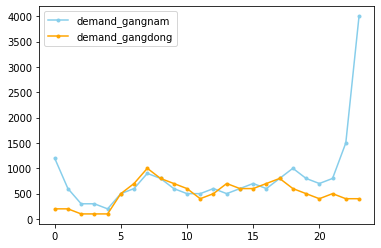

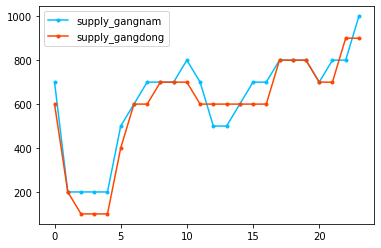

In [ ]:
df.plot(y=['demand_gangnam', 'demand_gangdong'], color=['skyblue', 'orange'], marker='.')
df.plot(y=['supply_gangnam', 'supply_gangdong'], color=['deepskyblue', 'orangered'], marker='.')

# 강남은 24시 근처에 콜이 폭주하는 상황 
# 강동은 아침시간이 가장 콜이 많고 이후로는 조금씩 줄어듬
# 공급은 양쪽 지역에서 유사

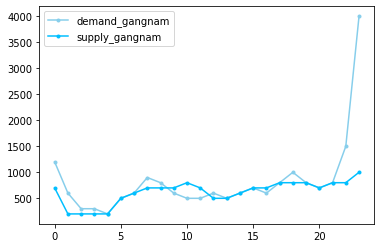

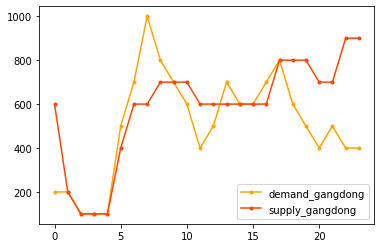

In [ ]:
df.plot(y=['demand_gangnam', 'supply_gangnam'], color=['skyblue', 'deepskyblue'], marker='.')
df.plot(y=['demand_gangdong', 'supply_gangdong'], color=['orange', 'orangered'], marker='.')

# 강남은 24시 근처에 콜이 폭주하고 공급이 못따라줌  
# 강동은 아침시간에 공급이 부족하고 밤시간에는 오히려 과공급

In [ ]:
# 탑승을 시뮬레이션 - 탑승은 수요가 공급에 매치될 때 일어날 수 있음
# 수요 10, 공급 30 = 탑승 10 
# 수요 30, 공급 10 = 탑승 10

df['ride_gangnam'] = np.minimum(demand_gangnam, supply_gangnam)
df['ride_gangdong'] = np.minimum(demand_gangdong, supply_gangdong)

df['d2r_gangnam'] = df['ride_gangnam'] / df['demand_gangnam'] # demand to ride
df['d2r_gangdong'] = df['ride_gangdong'] / df['demand_gangdong']

df

,demand_gangnam,demand_gangdong,supply_gangnam,supply_gangdong,ride_gangnam,ride_gangdong,d2r_gangnam,d2r_gangdong
0,1200,200,700,600,700,200,0.58,1.00
1,600,200,200,200,200,200,0.33,1.00
2,300,100,200,100,200,100,0.67,1.00
3,300,100,200,100,200,100,0.67,1.00
4,200,100,200,100,200,100,1.00,1.00
5,500,500,500,400,500,400,1.00,0.80
6,600,700,600,600,600,600,1.00,0.86
7,900,1000,700,600,700,600,0.78,0.60
8,800,800,700,700,700,700,0.88,0.88
9,600,700,700,700,600,700,1.00,1.00


In [ ]:
revenue_per_ride = 1 # 시뮬레이션을 심플하게 만들기 위해 탑승당 매출은 1원으로 생각 

df['rev_gangnam'] = df['ride_gangnam'] * revenue_per_ride
df['rev_gangdong'] = df['ride_gangdong'] * revenue_per_ride
df

,demand_gangnam,demand_gangdong,supply_gangnam,supply_gangdong,ride_gangnam,ride_gangdong,d2r_gangnam,d2r_gangdong,rev_gangnam,rev_gangdong
0,1200,200,700,600,700,200,0.58,1.00,700,200
1,600,200,200,200,200,200,0.33,1.00,200,200
2,300,100,200,100,200,100,0.67,1.00,200,100
3,300,100,200,100,200,100,0.67,1.00,200,100
4,200,100,200,100,200,100,1.00,1.00,200,100
5,500,500,500,400,500,400,1.00,0.80,500,400
6,600,700,600,600,600,600,1.00,0.86,600,600
7,900,1000,700,600,700,600,0.78,0.60,700,600
8,800,800,700,700,700,700,0.88,0.88,700,700
9,600,700,700,700,600,700,1.00,1.00,600,700


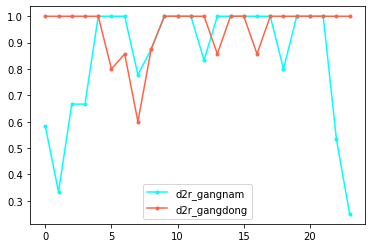

In [ ]:
df.plot(y=['d2r_gangnam', 'd2r_gangdong'], color=['cyan', 'tomato'], marker='.')


지금까지 수요, 공급, 탑승, 하차완료율 데이터를 생성해 보았습니다. 

In [ ]:
df.sum()
# rev_gangnam        14200.000000
# rev_gangdong       11200.000000


demand_gangnam    19,600.00
demand_gangdong   12,100.00
supply_gangnam    14,900.00
supply_gangdong   14,000.00
ride_gangnam      14,200.00
ride_gangdong     11,200.00
d2r_gangnam           20.32
d2r_gangdong          22.85
rev_gangnam       14,200.00
rev_gangdong      11,200.00
dtype: float64

In [ ]:
df.mean()
# d2r_gangnam          0.846644
# d2r_gangdong         0.951935

demand_gangnam    816.67
demand_gangdong   504.17
supply_gangnam    620.83
supply_gangdong   583.33
ride_gangnam      591.67
ride_gangdong     466.67
d2r_gangnam         0.85
d2r_gangdong        0.95
rev_gangnam       591.67
rev_gangdong      466.67
dtype: float64

In [ ]:
# 더 실질적인 하차완료율
df['ride_gangnam'].sum() / df['demand_gangnam'].sum()

# 평균의 평균을 보면 문제가 희석될 수 있음

0.7244897959183674

In [ ]:
df['ride_gangdong'].sum() / df['demand_gangdong'].sum()

0.9256198347107438

이제 탄력요금제 적용으로 인한 매출향상을 시뮬레이션 해보겠습니다. 

* 탄력요금제 
* 탄력요금제로 인한 수요 변화 
* 변화된 수요 및 매출, 하차완료율

을 하나씩 구현해볼 예정입니다. 

In [ ]:
# 수요의 가격탄력성을 구현

# 예: PED 1.3
# surge 1.0 = 가격 0% 인상 = 수요 변화 X = 1 / 1.0 
# surge 1.1 = 가격 10% 인상 = 수요 13% 하락 = 1 / 1.13 = 1 / (1 + ((surge - 1) * PED))
# surge 1.2 = 가격 20% 인상 = 수요 26% 하락 = 1 / 1.26 

def demand_change(surge, PED):
  price_diff = surge - 1
  demand_decrease = price_diff * PED
  return 1 / (1 + demand_decrease) 

print(demand_change(surge=1.1, PED=1.3))
print(demand_change(surge=1.2, PED=1.3))
print(demand_change(surge=1.3, PED=1.3))

print(demand_change(surge=1.1, PED=2.0))
print(demand_change(surge=1.2, PED=2.0))
print(demand_change(surge=1.3, PED=2.0))

0.8849557522123893
0.7936507936507936
0.7194244604316546
0.8333333333333333
0.7142857142857143
0.625


## 구현 및 관찰할 부분
탄력요금제 적용 => 탄력요금제로 인한 수요 변화 (공급은 동일 가정) => 이용 건 변화 => 탄력요금제로 인한 건당 매출 변화 => 총 매출 및 하차완료율 변화

In [ ]:
# 수요와 공급, 서지를 입력으로 하여 수요 변화, 이용 건 변화, 매출 변화, 하차완료율 변화를 구현하는 함수를 만들자

def simulate_rides(demand, supply, surge, PED):
  demand_surge = (demand * demand_change(surge, PED)).astype(int)

  df = pd.DataFrame({
    'demand': demand,
    'demand_surge': demand_surge,
    'supply': supply,
    'surge': surge, 
    'ride': np.minimum(demand, supply),
    'ride_surge': np.minimum(demand_surge, supply),
  })
  df['rev'] = df['ride'] * revenue_per_ride 
  df['rev_surge'] = df['ride_surge'] * revenue_per_ride * surge

  df['d2r'] = df['ride'] / df['demand'] # ride per demand
  df['d2r_surge'] = df['ride_surge'] / df['demand_surge'] # ride per demand

  df['rev_increase'] = df['rev_surge'] / df['rev']
  df['d2r_increase'] = df['d2r_surge'] / df['d2r']

  return df

# 서지 없이, 결과가 똑같이 나오는지를 검토하기 위한 1 로 이루어진 array
surge_1 = np.ones(24)

simulate_rides(demand_gangnam, supply_gangnam, surge_1, 1.3)
# surge = 1.0 이므로 모두 같은 값이 나와야 함

,demand,demand_surge,supply,surge,ride,ride_surge,rev,rev_surge,d2r,d2r_surge,rev_increase,d2r_increase
0,1200,1200,700,1.00,700,700,700,700.00,0.58,0.58,1.00,1.00
1,600,600,200,1.00,200,200,200,200.00,0.33,0.33,1.00,1.00
2,300,300,200,1.00,200,200,200,200.00,0.67,0.67,1.00,1.00
3,300,300,200,1.00,200,200,200,200.00,0.67,0.67,1.00,1.00
4,200,200,200,1.00,200,200,200,200.00,1.00,1.00,1.00,1.00
5,500,500,500,1.00,500,500,500,500.00,1.00,1.00,1.00,1.00
6,600,600,600,1.00,600,600,600,600.00,1.00,1.00,1.00,1.00
7,900,900,700,1.00,700,700,700,700.00,0.78,0.78,1.00,1.00
8,800,800,700,1.00,700,700,700,700.00,0.88,0.88,1.00,1.00
9,600,600,700,1.00,600,600,600,600.00,1.00,1.00,1.00,1.00


In [ ]:
# TEST
simulate_rides(demand_gangnam, supply_gangnam, surge_1*1.2, 1.3)
# 0시 = 공급대비 수요가 많음 = 서지가 들어가서 수요가 줄어들어도 여전히 공급보다 수요 초과 = 매출 상승, 하차완료율 상승 

,demand,demand_surge,supply,surge,ride,ride_surge,rev,rev_surge,d2r,d2r_surge,rev_increase,d2r_increase
0,1200,952,700,1.20,700,700,700,840.00,0.58,0.74,1.20,1.26
1,600,476,200,1.20,200,200,200,240.00,0.33,0.42,1.20,1.26
2,300,238,200,1.20,200,200,200,240.00,0.67,0.84,1.20,1.26
3,300,238,200,1.20,200,200,200,240.00,0.67,0.84,1.20,1.26
4,200,158,200,1.20,200,158,200,189.60,1.00,1.00,0.95,1.00
5,500,396,500,1.20,500,396,500,475.20,1.00,1.00,0.95,1.00
6,600,476,600,1.20,600,476,600,571.20,1.00,1.00,0.95,1.00
7,900,714,700,1.20,700,700,700,840.00,0.78,0.98,1.20,1.26
8,800,634,700,1.20,700,634,700,760.80,0.88,1.00,1.09,1.14
9,600,476,700,1.20,600,476,600,571.20,1.00,1.00,0.95,1.00


In [ ]:
# 탄력요금제를 테스트해보자
# 마음대로 서지를 넣어보았다

surge_gangnam_1 = np.array([
  1.2, 1.2, 1.2, 1.2, 1, # 0~4시 
  1, 1, 1.2, 1.2, 1, # 5~9시
  1, 1, 1.2, 1, 1, # 10~14시
  1, 1, 1, 1.2, 1, # 15~19시
  1, 1, 1.2, 1.2  # 20~23시                
])

In [ ]:
result = simulate_rides(demand_gangnam, supply_gangnam, surge_gangnam_1, 1.3)
result
# 다 좋아진곳만 있다

,demand,demand_surge,supply,surge,ride,ride_surge,rev,rev_surge,d2r,d2r_surge,rev_increase,d2r_increase
0,1200,952,700,1.20,700,700,700,840.00,0.58,0.74,1.20,1.26
1,600,476,200,1.20,200,200,200,240.00,0.33,0.42,1.20,1.26
2,300,238,200,1.20,200,200,200,240.00,0.67,0.84,1.20,1.26
3,300,238,200,1.20,200,200,200,240.00,0.67,0.84,1.20,1.26
4,200,200,200,1.00,200,200,200,200.00,1.00,1.00,1.00,1.00
5,500,500,500,1.00,500,500,500,500.00,1.00,1.00,1.00,1.00
6,600,600,600,1.00,600,600,600,600.00,1.00,1.00,1.00,1.00
7,900,714,700,1.20,700,700,700,840.00,0.78,0.98,1.20,1.26
8,800,634,700,1.20,700,634,700,760.80,0.88,1.00,1.09,1.14
9,600,600,700,1.00,600,600,600,600.00,1.00,1.00,1.00,1.00


In [ ]:
def print_summary(result_df):
  rev = result_df['rev'].sum()
  rev_surge = result_df['rev_surge'].sum()

  d2r = result_df['ride'].sum() / result_df['demand'].sum()
  d2r_surge = result_df['ride_surge'].sum() / result_df['demand_surge'].sum()

  return pd.DataFrame({
    '탑승_탄력요금': result_df['ride_surge'].sum(),
    '매출_오리지널': rev, 
    '매출_탄력요금': rev_surge,
    '매출_증가율': rev_surge / rev,    
    '하차완료율_오리지널': d2r, 
    '하차완료율_탄력요금': d2r_surge,   
    '하차완료율_증가율': d2r_surge / d2r   
  }, index=[0])

print_summary(result)


,탑승_탄력요금,매출_오리지널,매출_탄력요금,매출_증가율,하차완료율_오리지널,하차완료율_탄력요금,하차완료율_증가율
0,14103,14200,"15,243.60",1.07,0.72,0.82,1.13


In [ ]:
# 잘못하면 더 안좋아질 수도 있다 
surge_gangnam_2 = np.array([
  1, 1, 1, 1, 1, # 0~4시 
  1, 1, 1, 1, 1, # 5~9시
  2, 2, 1, 1, 1, # 10~14시
  1, 1, 1, 1, 1, # 15~19시
  1, 1, 1, 1  # 20~23시                
])

result = simulate_rides(demand_gangnam, supply_gangnam, surge_gangnam_2, 1.3)
result

,demand,demand_surge,supply,surge,ride,ride_surge,rev,rev_surge,d2r,d2r_surge,rev_increase,d2r_increase
0,1200,1200,700,1,700,700,700,700,0.58,0.58,1.00,1.00
1,600,600,200,1,200,200,200,200,0.33,0.33,1.00,1.00
2,300,300,200,1,200,200,200,200,0.67,0.67,1.00,1.00
3,300,300,200,1,200,200,200,200,0.67,0.67,1.00,1.00
4,200,200,200,1,200,200,200,200,1.00,1.00,1.00,1.00
5,500,500,500,1,500,500,500,500,1.00,1.00,1.00,1.00
6,600,600,600,1,600,600,600,600,1.00,1.00,1.00,1.00
7,900,900,700,1,700,700,700,700,0.78,0.78,1.00,1.00
8,800,800,700,1,700,700,700,700,0.88,0.88,1.00,1.00
9,600,600,700,1,600,600,600,600,1.00,1.00,1.00,1.00


In [ ]:
print_summary(result)
# 가격을 인상했음에도 불구하고 매출이 1% 하락 

,탑승_탄력요금,매출_오리지널,매출_탄력요금,매출_증가율,하차완료율_오리지널,하차완료율_탄력요금,하차완료율_증가율
0,13634,14200,14068,0.99,0.72,0.72,0.99


In [ ]:

# 최적의 가격은? 계산해보자
# 수요-공급-매출의 관계가 일반적인 경우와 다르기 때문에, 앞에서 공부했던 공식이 적용이 안됨 
# 일반적인 경우는 공급이 수요와 일치할 수 있다고 가정하지만, 
# 모빌리티의 경우는 공급이 한정되어있기 때문
# 큰 방향은 적용이 된다 (PED가 높으면, 되도록 낮은가격, PED가 낮으면, 되도록 높은 가격)
# 완전히 다른 포뮬러가 필요

# revenue
# = ride * surge = min(demand*demand_change, supply) * surge
# = min(demand * 1 / (1 + (surge - 1 * PED)), supply) * surge
# = min(demand * surge / (1 + (surge-1) * PED ), supply * surge)
# ~ min(demand, supply*surge) (when PED=1)
# = min(demand/supply, surge)
# surge 를 d/s 까지 올리는것은 매출에 도움이 된다는 뜻


In [ ]:
# 서지에 따른 수요/공급/탑승 변화 시각화 자료
# https://docs.google.com/spreadsheets/d/1bPuwq6SD95sE2UVi65DEJgV9Me_GwoB1YaiEKhkAVto/edit#gid=0

In [ ]:
# 공격적인 서지 룰을 만들어보자. 
print(demand_gangnam / supply_gangnam)

surge_gangnam = np.minimum(np.maximum(demand_gangnam / supply_gangnam , 1), 2)

result = simulate_rides(demand_gangnam, supply_gangnam, surge_gangnam, 1.3)
result

[1.71428571 3.         1.5        1.5        1.         1.
 1.         1.28571429 1.14285714 0.85714286 0.625      0.71428571
 1.2        1.         1.         1.         0.85714286 1.
 1.25       1.         1.         1.         1.875      4.        ]


,demand,demand_surge,supply,surge,ride,ride_surge,rev,rev_surge,d2r,d2r_surge,rev_increase,d2r_increase
0,1200,622,700,1.71,700,622,700,"1,066.29",0.58,1.00,1.52,1.71
1,600,260,200,2.00,200,200,200,400.00,0.33,0.77,2.00,2.31
2,300,181,200,1.50,200,181,200,271.50,0.67,1.00,1.36,1.50
3,300,181,200,1.50,200,181,200,271.50,0.67,1.00,1.36,1.50
4,200,200,200,1.00,200,200,200,200.00,1.00,1.00,1.00,1.00
5,500,500,500,1.00,500,500,500,500.00,1.00,1.00,1.00,1.00
6,600,600,600,1.00,600,600,600,600.00,1.00,1.00,1.00,1.00
7,900,656,700,1.29,700,656,700,843.43,0.78,1.00,1.20,1.29
8,800,674,700,1.14,700,674,700,770.29,0.88,1.00,1.10,1.14
9,600,600,700,1.00,600,600,600,600.00,1.00,1.00,1.00,1.00


In [ ]:
print_summary(result)

# 매출 18.7%, 하차완료율 30.5% 상승  

,탑승_탄력요금,매출_오리지널,매출_탄력요금,매출_증가율,하차완료율_오리지널,하차완료율_탄력요금,하차완료율_증가율
0,13845,14200,"16,851.08",1.19,0.72,0.95,1.30


In [ ]:
surge_gangdong = np.minimum(np.maximum(demand_gangdong / supply_gangdong , 1), 2)

result = simulate_rides(demand_gangdong, supply_gangdong, surge_gangdong, 1.3)
result
# 넘치는 수요가 없을때는 비교적 작은 성과

,demand,demand_surge,supply,surge,ride,ride_surge,rev,rev_surge,d2r,d2r_surge,rev_increase,d2r_increase
0,200,200,600,1.00,200,200,200,200.00,1.00,1.00,1.00,1.00
1,200,200,200,1.00,200,200,200,200.00,1.00,1.00,1.00,1.00
2,100,100,100,1.00,100,100,100,100.00,1.00,1.00,1.00,1.00
3,100,100,100,1.00,100,100,100,100.00,1.00,1.00,1.00,1.00
4,100,100,100,1.00,100,100,100,100.00,1.00,1.00,1.00,1.00
5,500,377,400,1.25,400,377,400,471.25,0.80,1.00,1.18,1.25
6,700,575,600,1.17,600,575,600,670.83,0.86,1.00,1.12,1.17
7,1000,535,600,1.67,600,535,600,891.67,0.60,1.00,1.49,1.67
8,800,674,700,1.14,700,674,700,770.29,0.88,1.00,1.10,1.14
9,700,700,700,1.00,700,700,700,700.00,1.00,1.00,1.00,1.00


In [ ]:
print_summary(result)
# 사실 5.7%도 훌륭하다

,탑승_탄력요금,매출_오리지널,매출_탄력요금,매출_증가율,하차완료율_오리지널,하차완료율_탄력요금,하차완료율_증가율
0,11011,11200,"11,845.70",1.06,0.93,1.00,1.08


### 탄력요금 차이에 따른 드라이버 이동도 구현해보자 
과연 얼마나 효율을 올릴 수 있을까?

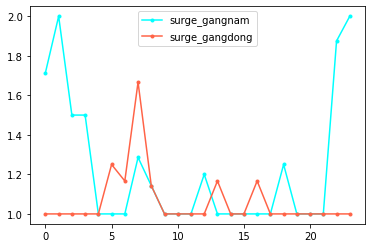

In [ ]:
df_surge = pd.DataFrame({
    'surge_gangnam': surge_gangnam,
    'surge_gangdong': surge_gangdong,
})
df_surge.plot(y=['surge_gangnam', 'surge_gangdong'], color=['cyan', 'tomato'], marker='.')


In [ ]:
surge_difference = surge_gangnam - surge_gangdong
surge_difference

array([ 0.71428571,  1.        ,  0.5       ,  0.5       ,  0.        ,
       -0.25      , -0.16666667, -0.38095238,  0.        ,  0.        ,
        0.        ,  0.        ,  0.2       , -0.16666667,  0.        ,
        0.        , -0.16666667,  0.        ,  0.25      ,  0.        ,
        0.        ,  0.        ,  0.875     ,  1.        ])

In [ ]:
driver_move_factor = 0.8 # per surge difference 1.0 

to_gangnam = np.minimum(surge_difference, 1) * driver_move_factor * supply_gangdong
to_gangnam[to_gangnam < 0] = 0
to_gangnam = to_gangnam.round(0).astype(int)

to_gangdong = -np.minimum(surge_difference, 1) * driver_move_factor * supply_gangnam
to_gangdong[to_gangdong < 0] = 0
to_gangdong = to_gangdong.round(0).astype(int)

supply_gangnam_move = supply_gangnam + to_gangnam - to_gangdong
supply_gangdong_move = supply_gangdong + to_gangdong - to_gangnam

df_move = pd.DataFrame({
    'demand_gangnam': demand_gangnam,
    'demand_gangdong': demand_gangdong,
    'surge_gangnam': surge_gangnam,
    'surge_gangdong': surge_gangdong,
    'surge_difference': surge_difference,
    'to_gangnam': to_gangnam,
    'to_gangdong': to_gangdong,
    'supply_gangnam': supply_gangnam,
    'supply_gangdong': supply_gangdong,
    'supply_gangnam_move': supply_gangnam_move,
    'supply_gangdong_move': supply_gangdong_move,
})
df_move


,demand_gangnam,demand_gangdong,surge_gangnam,surge_gangdong,surge_difference,to_gangnam,to_gangdong,supply_gangnam,supply_gangdong,supply_gangnam_move,supply_gangdong_move
0,1200,200,1.71,1.00,0.71,343,0,700,600,1043,257
1,600,200,2.00,1.00,1.00,160,0,200,200,360,40
2,300,100,1.50,1.00,0.50,40,0,200,100,240,60
3,300,100,1.50,1.00,0.50,40,0,200,100,240,60
4,200,100,1.00,1.00,0.00,0,0,200,100,200,100
5,500,500,1.00,1.25,-0.25,0,100,500,400,400,500
6,600,700,1.00,1.17,-0.17,0,80,600,600,520,680
7,900,1000,1.29,1.67,-0.38,0,213,700,600,487,813
8,800,800,1.14,1.14,0.00,0,0,700,700,700,700
9,600,700,1.00,1.00,0.00,0,0,700,700,700,700


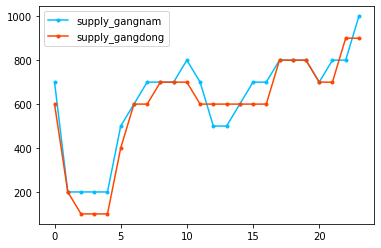

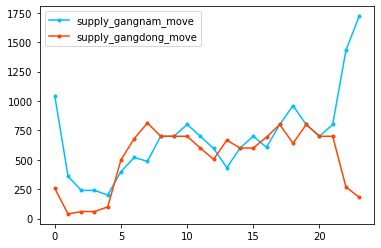

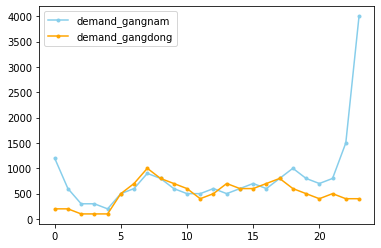

In [ ]:
df_move.plot(y=['supply_gangnam', 'supply_gangdong'], color=['deepskyblue', 'orangered'], marker='.')
df_move.plot(y=['supply_gangnam_move', 'supply_gangdong_move'], color=['deepskyblue', 'orangered'], marker='.')
df_move.plot(y=['demand_gangnam', 'demand_gangdong'], color=['skyblue', 'orange'], marker='.')


In [ ]:
result_gangnam = simulate_rides(demand_gangnam, supply_gangnam, surge_gangnam, 1.3)
print_summary(result_gangnam)

,탑승_탄력요금,매출_오리지널,매출_탄력요금,매출_증가율,하차완료율_오리지널,하차완료율_탄력요금,하차완료율_증가율
0,13845,14200,"16,851.08",1.19,0.72,0.95,1.30


In [ ]:
result_gangdong = simulate_rides(demand_gangdong, supply_gangdong, surge_gangdong, 1.3)
print_summary(result_gangdong)

,탑승_탄력요금,매출_오리지널,매출_탄력요금,매출_증가율,하차완료율_오리지널,하차완료율_탄력요금,하차완료율_증가율
0,11011,11200,"11,845.70",1.06,0.93,1.00,1.08


In [ ]:
result_gangnam_move = simulate_rides(demand_gangnam, supply_gangnam_move, surge_gangnam, 1.3)
print_summary(result_gangnam_move)

,탑승_탄력요금,매출_오리지널,매출_탄력요금,매출_증가율,하차완료율_오리지널,하차완료율_탄력요금,하차완료율_증가율
0,14209,15929,"17,946.79",1.13,0.81,0.97,1.19


In [ ]:
result_gangdong_move = simulate_rides(demand_gangdong, supply_gangdong_move, surge_gangdong, 1.3)
print_summary(result_gangdong_move)

,탑승_탄력요금,매출_오리지널,매출_탄력요금,매출_증가율,하차완료율_오리지널,하차완료율_탄력요금,하차완료율_증가율
0,10421,11163,"11,255.70",1.01,0.92,0.95,1.03


In [ ]:
surge_gangnam_move = np.minimum(np.maximum(demand_gangnam / supply_gangnam_move , 1), 2)
surge_gangdong_move = np.minimum(np.maximum(demand_gangdong / supply_gangdong_move , 1), 2)


In [ ]:
result_gangnam_move = simulate_rides(demand_gangnam, supply_gangnam_move, surge_gangnam_move, 1.3)
print_summary(result_gangnam_move)

,탑승_탄력요금,매출_오리지널,매출_탄력요금,매출_증가율,하차완료율_오리지널,하차완료율_탄력요금,하차완료율_증가율
0,15643,15929,"18,648.28",1.17,0.81,1.00,1.23


In [ ]:
result_gangdong_move = simulate_rides(demand_gangdong, supply_gangdong_move, surge_gangdong_move, 1.3)
print_summary(result_gangdong_move)

,탑승_탄력요금,매출_오리지널,매출_탄력요금,매출_증가율,하차완료율_오리지널,하차완료율_탄력요금,하차완료율_증가율
0,11029,11163,"11,763.57",1.05,0.92,1.00,1.08


In [ ]:
# 매출도 상당히 차이가 나지만 (매출_탄력요금의 합을 비교)
# 강남지역 하차완료율은 눈에띄게 좋아짐 (94.5% -> 99.9%)

In [ ]:
result_gangnam[23:24]

,demand,demand_surge,supply,surge,ride,ride_surge,rev,rev_surge,d2r,d2r_surge,rev_increase,d2r_increase
23,4000,1739,1000,2.00,1000,1000,1000,"2,000.00",0.25,0.58,2.00,2.30


In [ ]:
result_gangnam_move[23:24]

,demand,demand_surge,supply,surge,ride,ride_surge,rev,rev_surge,d2r,d2r_surge,rev_increase,d2r_increase
23,4000,1739,1720,2.00,1720,1720,1720,"3,440.00",0.43,0.99,2.00,2.30


## 생각할거리 

* 현실에서는 탄력요금만으로 수요공급이 최적화되지는 않기에 더 많은 요소들을 고려해야 함
* 심지어 탄력요금이 최대로 들어가도 공급이 모자란경우도 많음 
* 실제로는 가격탄력성이 이렇게 단순하지 않고, 대안이 없을때 낮아지고, 대안이 많으면 높아짐

## 매출보다 더 중요한것들에 대하여

* 매출만을 최적화하는게 아니고 최종적으로는 승객을 태워야 함 (업의 본질) 
* 탄력요금제로 억압된 수요는 과연 어떻게 해소되는것인가?
* 수요가 분산될 수 있도록 하려면? (탄력요금을 미리 예고)
* 하차완료율 지표의 이중성: 효율성 향상으로 하차완료율이 올라가는건 좋지만, 탄력요금으로 하차완료율이 올라가는건 좋은것만은 아님


## 정리
이번 실습에서는 수요기반 모빌리티의 기본적인 비즈니스모델을 시뮬레이션 해봤습니다.  
그리고 여기에 Dynamic pricing 요소인 탄력요금제가 적용되었을때 매출과 하차완료율이 어떻게 변하는지 디테일하게 구현해보았습니다. 
그리고 몇가지의 탄력요금제 전략을 구현해보면서 어떤 전략을 취하는것이 매출이 최대화되는지 살펴보았습니다.

한가지 실습의 비밀이 있는데, 실습 내내 시간대별로 달라지는 수요와 공급을 구현하느라 시간대별 차트도 그려보고 테이블도 한페이지씩 출력해야 했습니다. 하지만 곰곰히 생각해보면 각각 시간의 매출을 최대화하는 작업은 굳이 시간대별로 작업 할 필요가 없습니다. 지금까지 문제를 실제로 필요한것보다 크고 복잡하게 생각하고있던것일수도 있습니다. 